<a href="https://colab.research.google.com/github/Eugeacosta/ProyectofinalDS/blob/main/Proyecto_Final_Acosta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Ventas en **Ferretería**

Motivación: En un mercado minorista competitivo, comprender a fondo los patrones de venta, el comportamiento de compra del cliente y la efectividad de las promociones es crucial para optimizar el inventario, mejorar la rentabilidad y personalizar las estrategias de marketing. Este proyecto busca extraer información valiosa del historial de transacciones para guiar decisiones empresariales informadas.

Audiencia:

Gerencia General: Para la toma de decisiones estratégicas sobre expansión, inversión y rentabilidad general.

Gerencia de Sucursales: Para evaluar el desempeño regional, identificar las sucursales más exitosas y gestionar el inventario local.

Equipos de Marketing y Ventas: Para diseñar promociones más efectivas, segmentar clientes y optimizar los canales de pago.

**Contexto Comercial y Analítico**

Preguntas/Hipótesis a Resolver
Preguntas
¿Cuál es la categoría de producto que genera el mayor volumen de ventas?

¿Existe una diferencia significativa en el valor de venta promedio entre las distintas sucursales o provincias?

¿Cuál es el medio de pago más utilizado y cómo se relaciona con el valor total de la venta o el uso de promociones?

¿Cómo influyen las promociones de producto y pago en el monto total de la venta?

¿Existe alguna estacionalidad o tendencia temporal en las ventas?

Hipótesis

H1 (Producto/Categoría): Las categorías de "Herramientas eléctricas" y "Herramientas manuales" representarán, en conjunto, más del 50% del valor total de las ventas.

H2 (Medio de Pago): Las ventas realizadas con tarjeta de crédito tendrán un valor promedio más alto que las realizadas con débito o Mercadopago, especialmente en transacciones con promociones de "cuotas sin interés".

H3 (Sucursal): La Sucursal Palermo o Buenos Aires registrará el mayor volumen de transacciones, pero la sucursal de Mendoza o Córdoba podría tener un valor de venta promedio (ticket promedio) superior, debido a posibles diferencias en la demanda local o en la mezcla de productos vendidos.

**Objetivo**

El objetivo principal de este proyecto es realizar un Análisis Exploratorio de Datos (EDA) exhaustivo del dataset de ventas de la ferretería para identificar patrones de compra, evaluar el rendimiento de las sucursales y determinar la efectividad de las promociones y medios de pago. Esto proporcionará una base de conocimiento para la optimización de las estrategias operativas, de marketing y financieras del negocio.

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Configuración del entorno de Python en Google Colab**

In [45]:
from google.colab import drive
import os

In [46]:
drive.mount("/content/drive")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [47]:
os.chdir("/content/drive/My Drive/")
print(os.getcwd())

/content/drive/My Drive


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df_ferreteria=pd.read_csv("/content/drive/MyDrive/retail_ferreteria.csv")

**Lectura del dataset**

In [50]:
df_ferreteria

,id_venta,id_cliente,nombre_cliente,sucursal,provincia,fecha_hora,producto,categoria,cantidad,precio_unitario,total_venta,medio_pago,promo_producto,promo_pago,otros_productos
0,1,2824,Benjamin Perez Diaz,Sucursal Palermo,Buenos Aires,2025-06-29 12:36:14,Caja de tornillos,Fijaciones,2.0,11937.33,23874.66,mercadopago,NaN,NaN,NaN
1,2,2424,Amparo Paez Rodriguez,Sucursal Mendoza,Mendoza,2025-02-27 08:47:28,Taladro eléctrico,Herramientas eléctricas,1.0,5591.07,5591.07,mercadopago,10% off,NaN,NaN
2,3,7873,Martina Diaz Gimenez,Sucursal Córdoba,Córdoba,2024-09-26 19:31:40,Sierra circular,Herramientas eléctricas,5.0,14631.34,73156.70,tarjeta_débito,2x1,5% off efectivo,NaN
3,4,5552,Sr(a). Thiago Agustin Quiroga,Sucursal Córdoba,Córdoba,2025-02-26 10:24:10,Llave inglesa,Herramientas manuales,3.0,6008.30,18024.90,tarjeta_débito,NaN,NaN,NaN
4,5,5333,Tomàs Victoria Aguero,Sucursal Palermo,Buenos Aires,2025-07-08 04:47:31,Sierra circular,Herramientas eléctricas,5.0,7116.48,35582.40,mercadopago,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,451,3641,Bautista Benjamin Ema Moreno,Sucursal Mendoza,Mendoza,2025-02-26 18:15:07,Taladro eléctrico,Herramientas eléctricas,2.0,3114.07,6228.14,tarjeta_crédito,NaN,5% off efectivo,Guantes de trabajo
3146,2165,5209,Tomàs Paez Campos,Sucursal Mendoza,Mendoza,2024-12-23 18:55:08,Rodillo de pintura,Accesorios pintura,3.0,48611.77,145835.31,mercadopago,sin interés,NaN,NaN
3147,2373,2349,Gabriel Emma Bustos,Sucursal Mendoza,Mendoza,2025-06-05 07:18:35,Pintura látex 4L,Pinturas,4.0,13563.95,54255.80,mercadopago,NaN,NaN,"Llave inglesa, Rodillo de pintura"
3148,2013,1862,Thiago Benjamin Clara Cordoba Navarro,Sucursal Rosario,Santa Fe,2024-11-15 22:52:42,Cinta métrica,Medición,5.0,10575.25,52876.25,tarjeta_débito,10% off,NaN,NaN


**Análisis inicial del dataset**

In [51]:
df_ferreteria.head()

,id_venta,id_cliente,nombre_cliente,sucursal,provincia,fecha_hora,producto,categoria,cantidad,precio_unitario,total_venta,medio_pago,promo_producto,promo_pago,otros_productos
0,1,2824,Benjamin Perez Diaz,Sucursal Palermo,Buenos Aires,2025-06-29 12:36:14,Caja de tornillos,Fijaciones,2.0,11937.33,23874.66,mercadopago,NaN,NaN,NaN
1,2,2424,Amparo Paez Rodriguez,Sucursal Mendoza,Mendoza,2025-02-27 08:47:28,Taladro eléctrico,Herramientas eléctricas,1.0,5591.07,5591.07,mercadopago,10% off,NaN,NaN
2,3,7873,Martina Diaz Gimenez,Sucursal Córdoba,Córdoba,2024-09-26 19:31:40,Sierra circular,Herramientas eléctricas,5.0,14631.34,73156.70,tarjeta_débito,2x1,5% off efectivo,NaN
3,4,5552,Sr(a). Thiago Agustin Quiroga,Sucursal Córdoba,Córdoba,2025-02-26 10:24:10,Llave inglesa,Herramientas manuales,3.0,6008.30,18024.90,tarjeta_débito,NaN,NaN,NaN
4,5,5333,Tomàs Victoria Aguero,Sucursal Palermo,Buenos Aires,2025-07-08 04:47:31,Sierra circular,Herramientas eléctricas,5.0,7116.48,35582.40,mercadopago,NaN,NaN,NaN


In [52]:
df_ferreteria.tail()

,id_venta,id_cliente,nombre_cliente,sucursal,provincia,fecha_hora,producto,categoria,cantidad,precio_unitario,total_venta,medio_pago,promo_producto,promo_pago,otros_productos
3145,451,3641,Bautista Benjamin Ema Moreno,Sucursal Mendoza,Mendoza,2025-02-26 18:15:07,Taladro eléctrico,Herramientas eléctricas,2.0,3114.07,6228.14,tarjeta_crédito,NaN,5% off efectivo,Guantes de trabajo
3146,2165,5209,Tomàs Paez Campos,Sucursal Mendoza,Mendoza,2024-12-23 18:55:08,Rodillo de pintura,Accesorios pintura,3.0,48611.77,145835.31,mercadopago,sin interés,NaN,NaN
3147,2373,2349,Gabriel Emma Bustos,Sucursal Mendoza,Mendoza,2025-06-05 07:18:35,Pintura látex 4L,Pinturas,4.0,13563.95,54255.80,mercadopago,NaN,NaN,"Llave inglesa, Rodillo de pintura"
3148,2013,1862,Thiago Benjamin Clara Cordoba Navarro,Sucursal Rosario,Santa Fe,2024-11-15 22:52:42,Cinta métrica,Medición,5.0,10575.25,52876.25,tarjeta_débito,10% off,NaN,NaN
3149,271,8178,Guillermina Flores Fernandez,Sucursal Mendoza,Mendoza,2025-04-11 08:13:19,Pintura látex 4L,Pinturas,1.0,15712.94,15712.94,tarjeta_crédito,NaN,NaN,"Destornillador, Martillo"


In [53]:
df_ferreteria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         3150 non-null   int64  
 1   id_cliente       3150 non-null   int64  
 2   nombre_cliente   3150 non-null   object 
 3   sucursal         3150 non-null   object 
 4   provincia        3150 non-null   object 
 5   fecha_hora       3150 non-null   object 
 6   producto         3150 non-null   object 
 7   categoria        3150 non-null   object 
 8   cantidad         3091 non-null   float64
 9   precio_unitario  3090 non-null   float64
 10  total_venta      3150 non-null   float64
 11  medio_pago       3091 non-null   object 
 12  promo_producto   1617 non-null   object 
 13  promo_pago       1606 non-null   object 
 14  otros_productos  945 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 369.3+ KB


In [54]:
df_ferreteria.shape

(3150, 15)

In [55]:
df_ferreteria.describe()

,id_venta,id_cliente,cantidad,precio_unitario,total_venta
count,3150.000000,3150.000000,3091.000000,3090.000000,3150.000000
mean,1496.748254,5548.900317,2.958913,25305.972612,74201.774194
std,867.007861,2608.448100,1.414646,14340.903448,61493.871222
min,1.000000,1001.000000,1.000000,1004.520000,-220383.250000
25%,747.000000,3274.000000,2.000000,12830.680000,26785.890000
50%,1496.500000,5561.500000,3.000000,25149.000000,57516.340000
75%,2247.750000,7822.500000,4.000000,37813.882500,108729.555000
max,3000.000000,9991.000000,5.000000,49993.000000,249860.200000


**Descripción de variables**


El dataset contiene información detallada sobre las transacciones de venta de una cadena de ferreterías. A continuación, se describen las 15 variables incluidas:

| Variable | Tipo de Dato (CSV) | Tipo de Dato (Análisis) | Descripción | Notas Clave para EDA |
| :--- | :--- | :--- | :--- | :--- |
| `id_venta` | `int` | **Nominal (ID)** | Identificador único de cada transacción de venta. | Utilizado para contar el número total de transacciones. |
| `id_cliente` | `int` | **Nominal (ID)** | Identificador único del cliente que realizó la compra. | Utilizado para contar clientes únicos y segmentación. |
| `nombre_cliente` | `object` | **Nominal** | Nombre completo del cliente. | No es clave para el análisis de ventas, pero útil para validación. |
| `sucursal` | `object` | **Nominal** | Sucursal donde se realizó la venta. | Variable clave para el análisis de rendimiento regional. |
| `provincia` | `object` | **Nominal** | Provincia donde se encuentra la sucursal. | Permite agrupar el rendimiento a nivel geográfico más amplio. |
| `fecha_hora` | `object` | **Temporal** | Fecha y hora exacta de la transacción. | Debe convertirse a `datetime` para análisis de tendencias y estacionalidad. |
| `producto` | `object` | **Nominal** | Nombre específico del artículo vendido. | Alto nivel de granularidad; útil para identificar *best-sellers*. |
| `categoria` | `object` | **Nominal** | Agrupación amplia del tipo de producto (Ej: Herramientas, Fijaciones). | Variable fundamental para el análisis de surtido y rentabilidad por rubro. |
| `cantidad` | `float` | **Cuantitativa Discreta** | Número de unidades del producto vendidas en la transacción. | Analizar la distribución; puede tener *outliers* altos. |
| `precio_unitario` | `float` | **Cuantitativa Continua** | Precio del producto por unidad al momento de la venta. | Útil para análisis de precios y márgenes (si se pudiera comparar con costo). |
| `total_venta` | `float` | **Cuantitativa Continua** | Valor total de la venta para ese producto (`cantidad` x `precio_unitario`). | **Métrica Clave (KPI)**. Analizar distribución, media, mediana y valores atípicos. |
| `medio_pago` | `object` | **Nominal** | Método utilizado para el pago (Ej: Tarjeta de Crédito, Mercadopago, Efectivo). | Variable clave para el análisis financiero y la efectividad de promociones de pago. |
| `promo_producto` | `object` | **Nominal** | Promoción aplicada al producto (Ej: "10% off", "2x1"). Contiene `NaN` si no aplica. | Deberá ser limpiada y categorizada para medir su impacto en `total_venta`. |
| `promo_pago` | `object` | **Nominal** | Promoción aplicada al medio de pago (Ej: "sin interés", "5% off efectivo"). Contiene `NaN` si no aplica. | Deberá ser limpiada y categorizada para medir su impacto en `total_venta`. |
| `otros_productos` | `object` | **Nominal** | Columna con posible información adicional o ruido, puede contener valores de cuotas, etc. | Revisar y limpiar o descartar si el contenido es redundante o poco estructurado. |



# **Data Wrangling: Limpieza y transformación de datos**

**Valores duplicados**

In [56]:
df_ferreteria.duplicated().sum()

np.int64(135)

In [57]:
filas_antes = len(df_ferreteria)
df_ferreteria = df_ferreteria.drop_duplicates()
filas_despues = len(df_ferreteria)

print(f"\nSe eliminaron {filas_antes - filas_despues} filas duplicadas.")


Se eliminaron 135 filas duplicadas.


**Valores nulos**

In [58]:
df_ferreteria.isnull().sum()

,0
id_venta,0
id_cliente,0
nombre_cliente,0
sucursal,0
provincia,0
fecha_hora,0
producto,0
categoria,0
cantidad,59
precio_unitario,59


In [59]:
print("--- Conteo de Valores Nulos por Columna (Inicial) ---")
print(df_ferreteria.isnull().sum())
print("-" * 50)

--- Conteo de Valores Nulos por Columna (Inicial) ---
id_venta              0
id_cliente            0
nombre_cliente        0
sucursal              0
provincia             0
fecha_hora            0
producto              0
categoria             0
cantidad             59
precio_unitario      59
total_venta           0
medio_pago           59
promo_producto     1476
promo_pago         1486
otros_productos    2106
dtype: int64
--------------------------------------------------


In [60]:
columnas_promo = ['promo_producto', 'promo_pago']

# Imputación: Reemplazar valores nulos por 'Sin Promoción'
df_ferreteria[columnas_promo] = df_ferreteria[columnas_promo].fillna('Sin Promoción')

print("Imputación de promociones realizada.")

Imputación de promociones realizada.


/tmp/ipython-input-744662297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ferreteria[columnas_promo] = df_ferreteria[columnas_promo].fillna('Sin Promoción')


In [61]:
df_ferreteria['otros_productos'].unique()

array([nan, 'Rodillo de pintura, Sierra circular', 'Rodillo de pintura',
       'Cinta métrica, Martillo', 'Guantes de trabajo',
       'Pintura látex 4L', 'Rodillo de pintura, Llave inglesa',
       'Caja de tornillos', 'Taladro eléctrico', 'Martillo',
       'Martillo, Caja de tornillos', 'Destornillador',
       'Pintura látex 4L, Cinta métrica', 'Martillo, Sierra circular',
       'Sierra circular, Destornillador',
       'Llave inglesa, Sierra circular',
       'Pintura látex 4L, Caja de tornillos', 'Llave inglesa',
       'Destornillador, Llave inglesa',
       'Pintura látex 4L, Rodillo de pintura',
       'Llave inglesa, Destornillador',
       'Guantes de trabajo, Caja de tornillos',
       'Caja de tornillos, Pintura látex 4L',
       'Cinta métrica, Pintura látex 4L', 'Taladro eléctrico, Martillo',
       'Rodillo de pintura, Cinta métrica', 'Llave inglesa, Martillo',
       'Cinta métrica', 'Pintura látex 4L, Destornillador',
       'Destornillador, Cinta métrica', 'Sierra 

In [62]:
nulos_medio_pago = df_ferreteria['medio_pago'].isnull().sum()

if nulos_medio_pago > 0:
    print(f"\nATENCIÓN: Se encontraron {nulos_medio_pago} nulos en 'medio_pago'.")


ATENCIÓN: Se encontraron 59 nulos en 'medio_pago'.


In [63]:
moda_pago = df_ferreteria['medio_pago'].mode()[0]

In [64]:
#Defino columnas que no deberian contener filas nulas para continuar con la limpieza

columnas_criticas = [
    'id_venta', 'id_cliente',
    'sucursal', 'provincia', 'categoria',
    'cantidad', 'precio_unitario', 'total_venta'
]


In [65]:

filas_a_eliminar = df_ferreteria[df_ferreteria[columnas_criticas].isnull().any(axis=1)].shape[0]


In [66]:
# Elimino las filas con nulos en las columnas críticas
df_ferreteria= df_ferreteria.dropna(subset=columnas_criticas)

print(f"--- Manejo de Nulos Críticos ---")
print(f"Se eliminaron {filas_a_eliminar} filas")
print(f"Filas restantes: {len(df_ferreteria)}")

--- Manejo de Nulos Críticos ---
Se eliminaron 118 filas
Filas restantes: 2897


In [67]:
print("\n--- Conteo Final de Nulos en Columnas Clave ---")
print(df_ferreteria[columnas_criticas + ['medio_pago']].isnull().sum())


--- Conteo Final de Nulos en Columnas Clave ---
id_venta            0
id_cliente          0
sucursal            0
provincia           0
categoria           0
cantidad            0
precio_unitario     0
total_venta         0
medio_pago         57
dtype: int64


**Valores outliers**

In [68]:
df_ferreteria.describe()

,id_venta,id_cliente,cantidad,precio_unitario,total_venta
count,2897.000000,2897.000000,2897.000000,2897.00000,2897.000000
mean,1498.233345,5550.947187,2.959268,25279.13116,74167.014204
std,865.318715,2603.423928,1.414115,14314.39852,61668.128008
min,1.000000,1001.000000,1.000000,1004.52000,-220383.250000
25%,751.000000,3290.000000,2.000000,12870.20000,26868.480000
50%,1494.000000,5555.000000,3.000000,25131.09000,57028.950000
75%,2243.000000,7818.000000,4.000000,37864.73000,108736.000000
max,3000.000000,9991.000000,5.000000,49993.00000,249860.200000


In [69]:
columnas_numericas = ['cantidad', 'precio_unitario', 'total_venta']
df_ferreteria = df_ferreteria.dropna(subset=columnas_numericas)

In [70]:
def detectar_outliers_iqr(df_ferreteria, columna):
    """Calcula y reporta la cantidad de outliers usando el método IQR (1.5 * IQR)."""

    # 1. Calcular Q1, Q3 e IQR
    Q1 = df_ferreteria[columna].quantile(0.25)
    Q3 = df_ferreteria[columna].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Definir los límites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # 3. Identificar outliers
    outliers = df_ferreteria[(df_ferreteria[columna] < limite_inferior) | (df_ferreteria[columna] > limite_superior)]

   # 4. Contar outliers
    outliers_bajos = df_ferreteria[df_ferreteria[columna] < limite_inferior].shape[0]
    outliers_altos = df_ferreteria[df_ferreteria[columna] > limite_superior].shape[0]
    total_outliers = outliers_bajos + outliers_altos

    # 5. Porcentaje de outliers
    porcentaje = (total_outliers / df_ferreteria  .shape[0]) * 100

    print(f"\n--- Análisis de Outliers en '{columna}' ---")
    print(f"Q1 (25%): {Q1:,.2f}")
    print(f"Q3 (75%): {Q3:,.2f}")
    print(f"IQR: {IQR:,.2f}")
    print(f"Límite Inferior (1.5*IQR): {limite_inferior:,.2f}")
    print(f"Límite Superior (1.5*IQR): {limite_superior:,.2f}")
    print(f"✅ Total de Outliers Detectados: {total_outliers} ({porcentaje:.2f}%)")

    return total_outliers

# Ejecutar la función para las columnas clave
outliers_cantidad = detectar_outliers_iqr(df_ferreteria, 'cantidad')
outliers_precio = detectar_outliers_iqr(df_ferreteria, 'precio_unitario')
outliers_total_venta = detectar_outliers_iqr(df_ferreteria, 'total_venta')


--- Análisis de Outliers en 'cantidad' ---
Q1 (25%): 2.00
Q3 (75%): 4.00
IQR: 2.00
Límite Inferior (1.5*IQR): -1.00
Límite Superior (1.5*IQR): 7.00
✅ Total de Outliers Detectados: 0 (0.00%)

--- Análisis de Outliers en 'precio_unitario' ---
Q1 (25%): 12,870.20
Q3 (75%): 37,864.73
IQR: 24,994.53
Límite Inferior (1.5*IQR): -24,621.60
Límite Superior (1.5*IQR): 75,356.53
✅ Total de Outliers Detectados: 0 (0.00%)

--- Análisis de Outliers en 'total_venta' ---
Q1 (25%): 26,868.48
Q3 (75%): 108,736.00
IQR: 81,867.52
Límite Inferior (1.5*IQR): -95,932.80
Límite Superior (1.5*IQR): 231,537.28
✅ Total de Outliers Detectados: 59 (2.04%)


**Transformaciones de Fechas/Nombres de variables/Valores**

In [71]:
df_ferreteria.fecha_hora = pd.to_datetime(df_ferreteria.fecha_hora)

In [72]:
df_ferreteria['anio'] = df_ferreteria['fecha_hora'].dt.year
df_ferreteria['mes'] = df_ferreteria['fecha_hora'].dt.month
df_ferreteria['dia'] = df_ferreteria['fecha_hora'].dt.day


In [73]:

print(" Componentes de fecha/hora extraídos: 'anio', 'mes', 'dia'.")


 Componentes de fecha/hora extraídos: 'anio', 'mes', 'dia'.


In [74]:
renombre_columnas = {
    'id_venta': 'ID Venta',
    'id_cliente': 'ID Cliente',
    'nombre_cliente': 'Nombre Cliente',
    'sucursal': 'Sucursal',
    'provincia': 'Provincia',
    'fecha_hora': 'Fecha y Hora',
    'producto': 'Producto',
    'categoria': 'Categoría',
    'cantidad': 'Cantidad',
    'precio_unitario': 'Precio Unitario',
    'total_venta': 'Total Venta',
    'medio_pago': 'Medio de Pago',
    'promo_producto': 'Promo Producto',
    'promo_pago': 'Promo Pago',
}

# Aplicar el renombre
df_ferreteria.rename(columns=renombre_columnas, inplace=True)


print("Nombres de columnas renombrados para mayor legibilidad.")
print("-" * 50)
print(df_ferreteria.columns.tolist())

Nombres de columnas renombrados para mayor legibilidad.
--------------------------------------------------
['ID Venta', 'ID Cliente', 'Nombre Cliente', 'Sucursal', 'Provincia', 'Fecha y Hora', 'Producto', 'Categoría', 'Cantidad', 'Precio Unitario', 'Total Venta', 'Medio de Pago', 'Promo Producto', 'Promo Pago', 'otros_productos', 'anio', 'mes', 'dia']


# **EDA: Análisis Exploratorio de datos**

In [75]:
#Configuración de Matplotlib para mejor visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [76]:
columnas_cuantitativas = ['Cantidad', 'Precio Unitario', 'Total Venta']
columnas_categoricas = ['Categoría', 'Sucursal', 'Medio de Pago']

**Análisis univariado**

##  Análisis de Variables Cuantitativas (Distribución)

Histogramas y Boxplots para Variables Cuantitativas


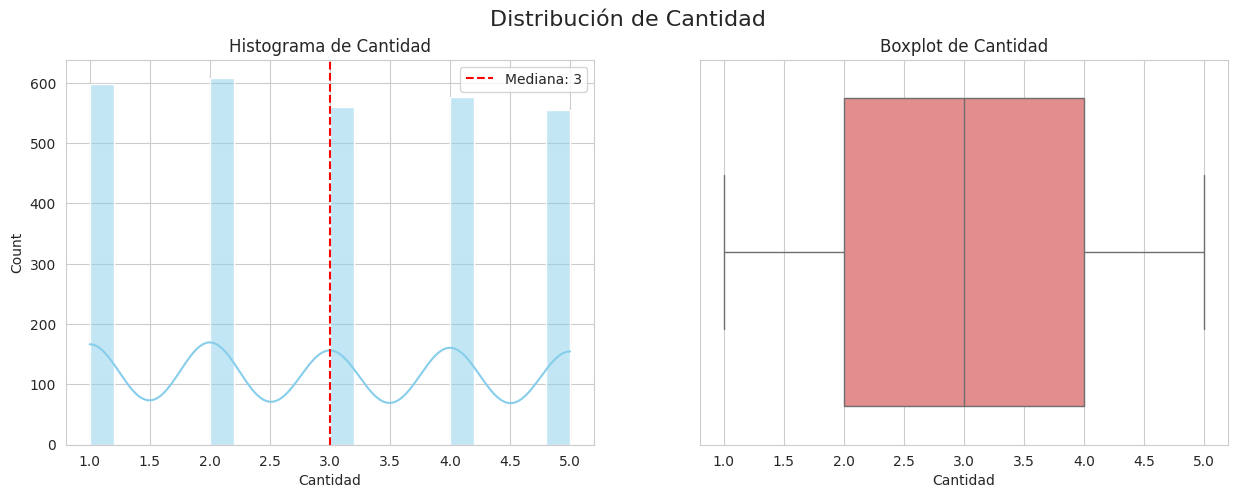

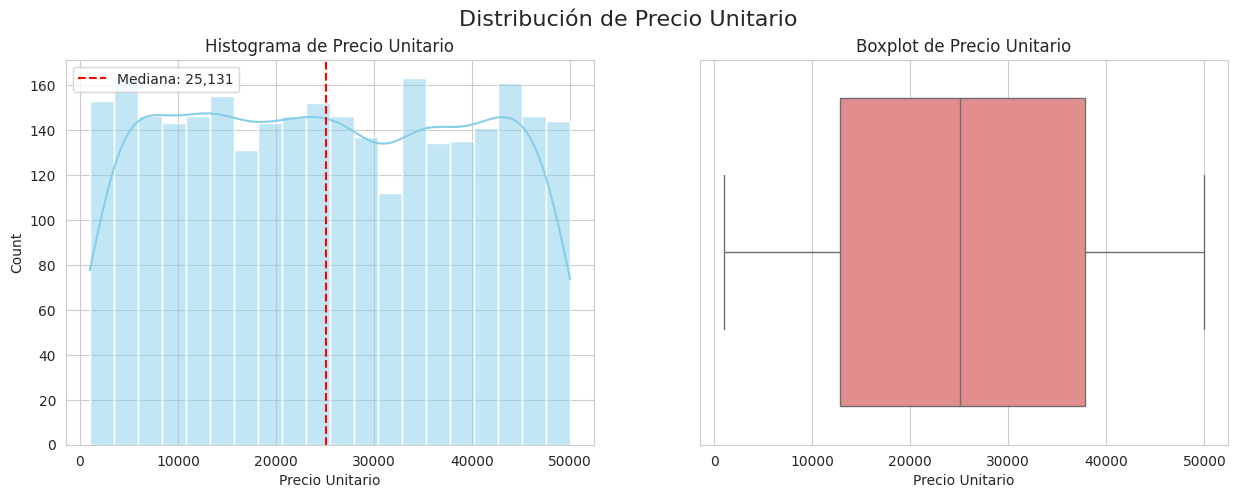

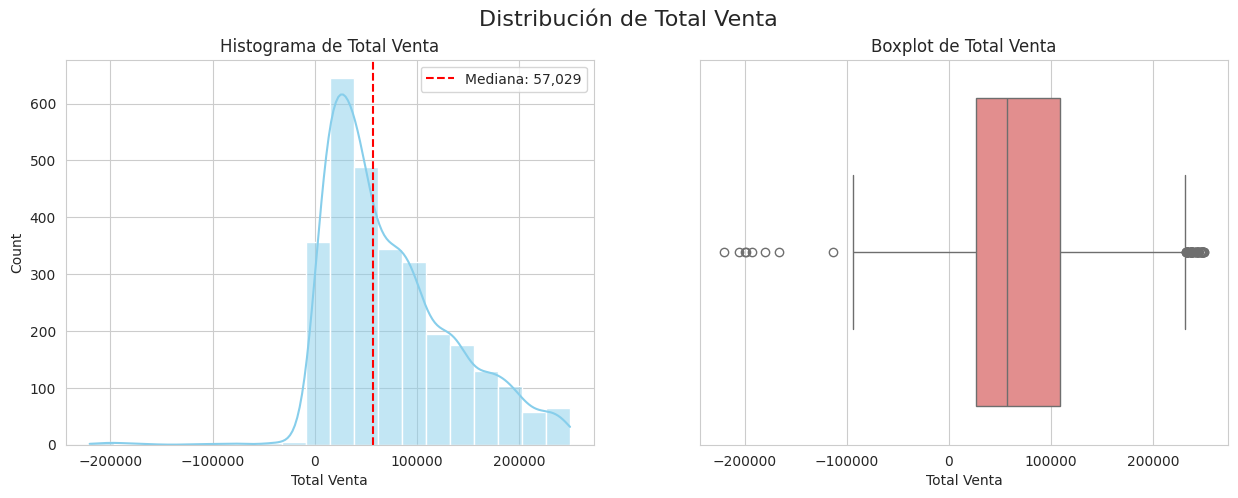

In [77]:
print("Histogramas y Boxplots para Variables Cuantitativas")

for col in columnas_cuantitativas:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Distribución de {col}', fontsize=16)

    # Histograma
    sns.histplot(df_ferreteria[col], kde=True, ax=axes[0], bins=20, color='skyblue')
    axes[0].axvline(df_ferreteria[col].median(), color='red', linestyle='--', label=f'Mediana: {df_ferreteria[col].median():,.0f}')
    axes[0].set_title(f'Histograma de {col}')
    axes[0].legend()
    axes[0].grid(True)

    # Boxplot
    sns.boxplot(x=df_ferreteria[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot de {col}')



## Análisis de Variables Categóricas (Frecuencias)




Gráficos de Barras para Variables Categóricas


/tmp/ipython-input-2557687646.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


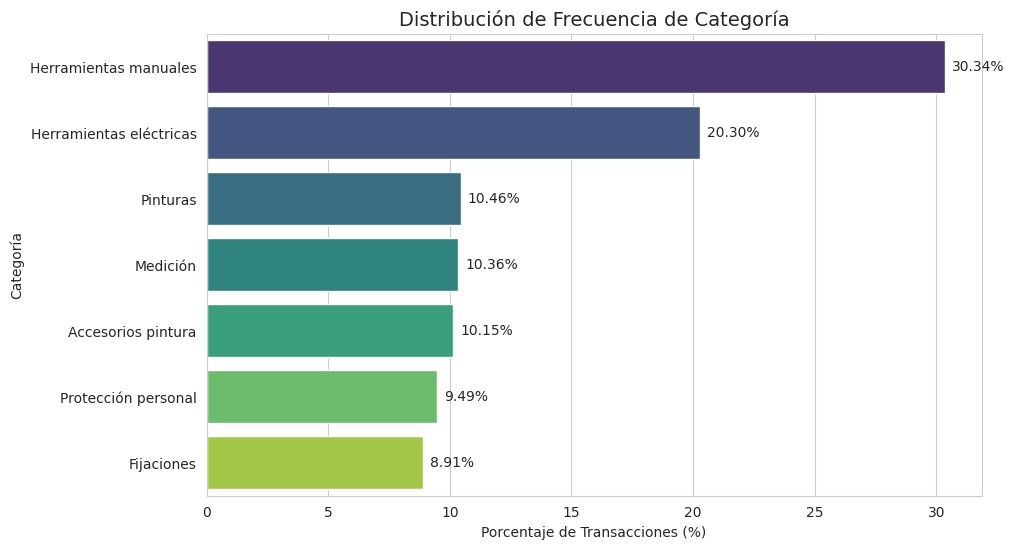

/tmp/ipython-input-2557687646.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


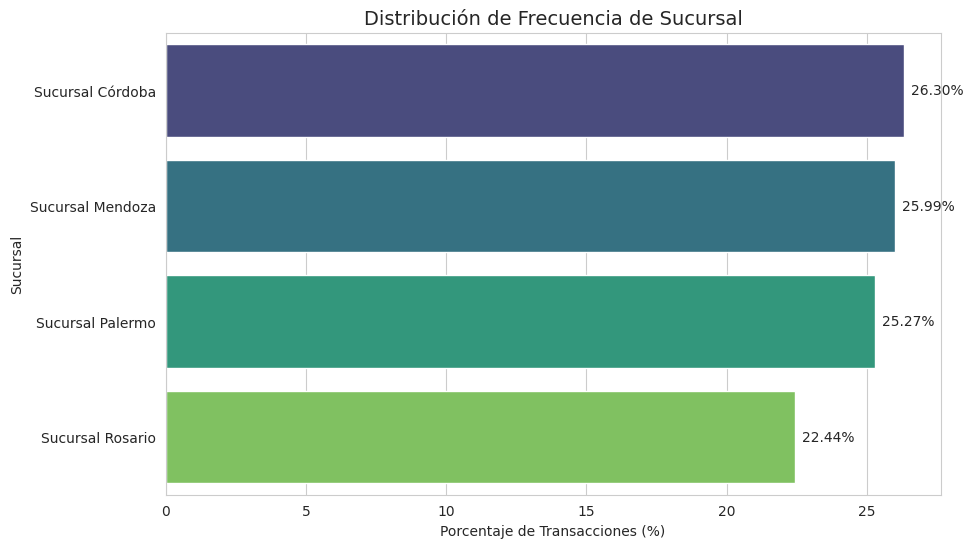

/tmp/ipython-input-2557687646.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


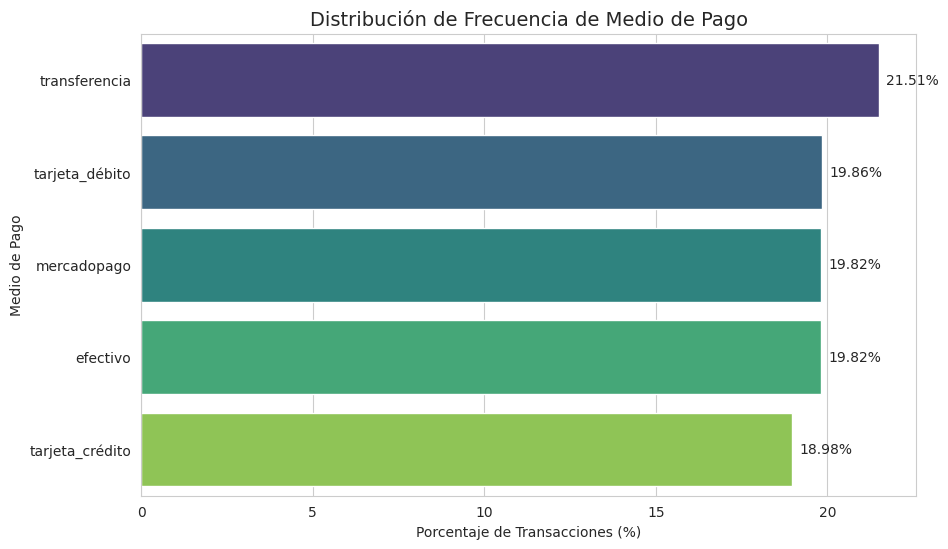

In [78]:

print("\nGráficos de Barras para Variables Categóricas")

for col in columnas_categoricas:
    #  frecuencia y ordenar de mayor a menor
    conteo = df_ferreteria[col].value_counts(normalize=True).mul(100).rename('Porcentaje').reset_index()
    conteo.columns = [col, 'Porcentaje']

    plt.figure(figsize=(10, 6))

    # Crear el gráfico de barras
    ax = sns.barplot(
        x='Porcentaje',
        y=col,
        data=conteo,
        palette='viridis',
        order=conteo[col]
    )

    # etiquetas de porcentaje a las barras
    for p in ax.patches:
        percentage = f'{p.get_width():.2f}%'
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=10, xytext=(5, 0), textcoords='offset points')

    plt.title(f'Distribución de Frecuencia de {col}', fontsize=14)
    plt.xlabel('Porcentaje de Transacciones (%)')
    plt.ylabel(col)
    plt.show()

##Analisis temporal (Ventas por mes)

/tmp/ipython-input-644624717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mes', data=df_ferreteria.sort_values(by='mes'), palette='mako')


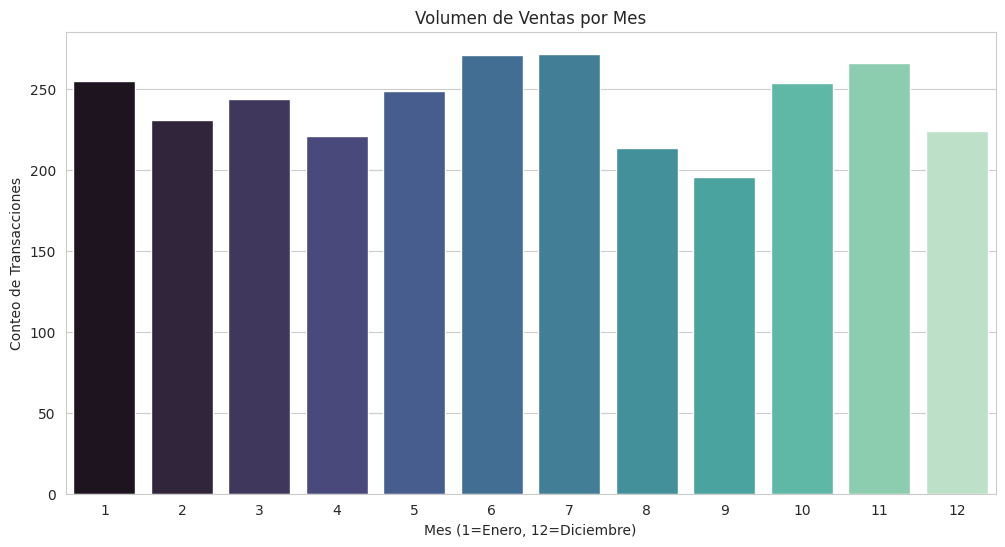

In [79]:

# Gráfico de ventas por Mes
plt.figure(figsize=(12, 6))
sns.countplot(x='mes', data=df_ferreteria.sort_values(by='mes'), palette='mako')
plt.title('Volumen de Ventas por Mes')
plt.ylabel('Conteo de Transacciones')
plt.xlabel('Mes (1=Enero, 12=Diciembre)')
plt.show()


Se visualiza una mayor cantidad de ventas en los meses Junio y Julio

----------------------------------------------------------------------------

**Análisis bivariado**

##Rendimiento Geográfico: Sucursal vs. Total Venta


Analizamos el ticket promedio (media del Total Venta) por cada sucursal para ver la eficiencia, más allá del volumen de transacciones.

--- 1. Ticket Promedio y Ventas Totales por Sucursal ---
| Sucursal         |   Conteo Transacciones |   Suma Total Venta |   Ticket Promedio |
|:-----------------|-----------------------:|-------------------:|------------------:|
| Sucursal Mendoza |                    753 |        56862482.38 |          75514.58 |
| Sucursal Rosario |                    650 |        48346106.98 |          74378.63 |
| Sucursal Córdoba |                    762 |        56668417.94 |          74368.00 |
| Sucursal Palermo |                    732 |        52984832.85 |          72383.65 |


/tmp/ipython-input-3924921335.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sucursal', y='Ticket Promedio', data=df_sucursal_venta, palette='plasma')


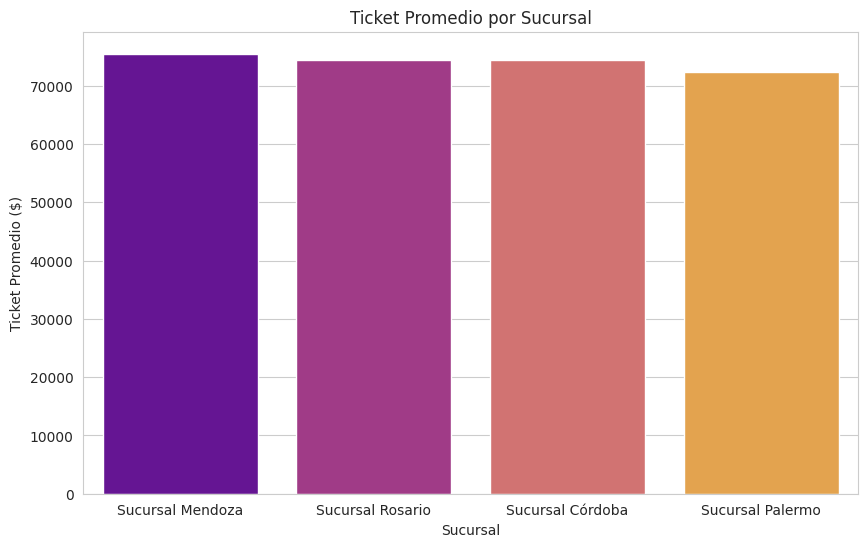

In [80]:
df_sucursal_venta = df_ferreteria.groupby('Sucursal')['Total Venta'].agg(['count', 'sum', 'mean']).reset_index()
df_sucursal_venta.columns = ['Sucursal', 'Conteo Transacciones', 'Suma Total Venta', 'Ticket Promedio']
df_sucursal_venta = df_sucursal_venta.sort_values(by='Ticket Promedio', ascending=False)

print("--- 1. Ticket Promedio y Ventas Totales por Sucursal ---")
print(df_sucursal_venta.to_markdown(index=False, floatfmt=".2f"))

plt.figure(figsize=(10, 6))
sns.barplot(x='Sucursal', y='Ticket Promedio', data=df_sucursal_venta, palette='plasma')
plt.title('Ticket Promedio por Sucursal')
plt.ylabel('Ticket Promedio ($)')
plt.show()


Aunque las sucursales de Mendoza y Córdoba tenían el mayor volumen de transacciones (visto en el análisis univariado), el Ticket Promedio puede revelar que otra sucursal es más eficiente.

Verificamos que las sucursales tienen un promedio de ticket parejo, Notamos que Suc. Rosario, aunque vende menos veces, sus clientes compran artículos más caros por visita.

----------------------------------------------------------------------------


##Producto y Rentabilidad: Categoría vs. Total Venta



--- 2. Ingreso Total por Categoría (Top 3) ---
| Categoría               |   Conteo Transacciones |   Suma Total Venta |   Ticket Promedio |
|:------------------------|-----------------------:|-------------------:|------------------:|
| Herramientas manuales   |                    879 |        66931298.62 |          76144.82 |
| Herramientas eléctricas |                    588 |        42483203.75 |          72250.35 |
| Medición                |                    300 |        23705566.53 |          79018.56 |


/tmp/ipython-input-3262063665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Suma Total Venta', y='Categoría', data=df_categoria_venta, palette='magma')


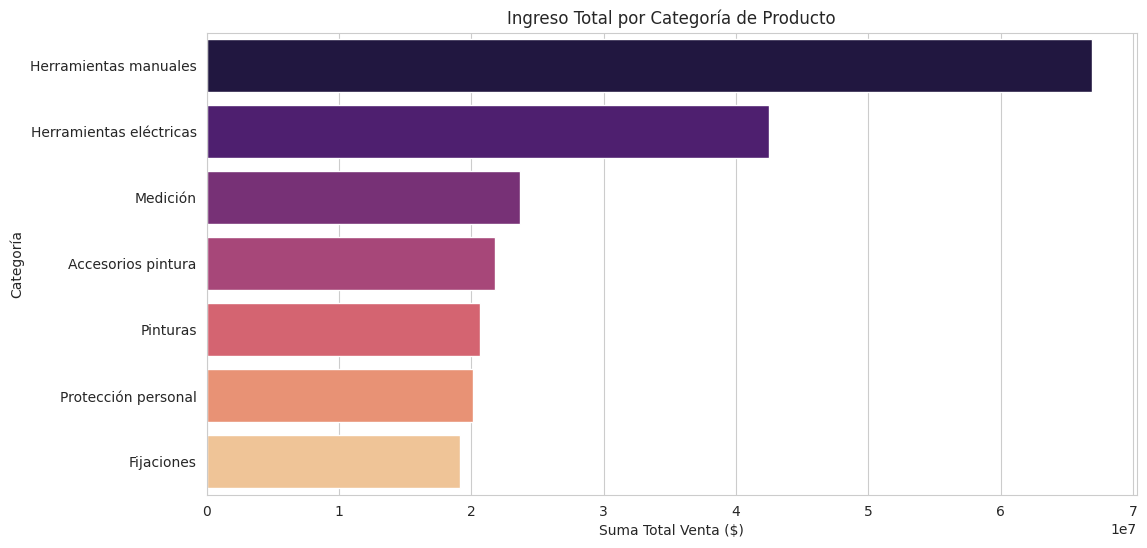

In [81]:
df_categoria_venta = df_ferreteria.groupby('Categoría')['Total Venta'].agg(['count', 'sum', 'mean']).reset_index()
df_categoria_venta.columns = ['Categoría', 'Conteo Transacciones', 'Suma Total Venta', 'Ticket Promedio']
df_categoria_venta = df_categoria_venta.sort_values(by='Suma Total Venta', ascending=False)

print("\n--- 2. Ingreso Total por Categoría (Top 3) ---")
print(df_categoria_venta.head(3).to_markdown(index=False, floatfmt=".2f"))

plt.figure(figsize=(12, 6))
sns.barplot(x='Suma Total Venta', y='Categoría', data=df_categoria_venta, palette='magma')
plt.title('Ingreso Total por Categoría de Producto')
plt.xlabel('Suma Total Venta ($)')
plt.ylabel('Categoría')
plt.show()

las categorías Herramientas Eléctricas y Herramientas Manuales suman más del 50% del Total Venta

----------------------------------------------------------------------------

##Impacto Financiero: Medio de Pago vs. Total Venta


--- 3. Ticket Promedio por Medio de Pago ---
| Medio de Pago   |   Conteo Transacciones |   Ticket Promedio |
|:----------------|-----------------------:|------------------:|
| transferencia   |                    611 |          79340.05 |
| tarjeta_crédito |                    539 |          74418.55 |
| tarjeta_débito  |                    564 |          73621.49 |
| mercadopago     |                    563 |          72537.27 |
| efectivo        |                    563 |          70233.45 |


/tmp/ipython-input-1865514983.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medio de Pago', y='Total Venta', data=df_ferreteria, palette='GnBu')


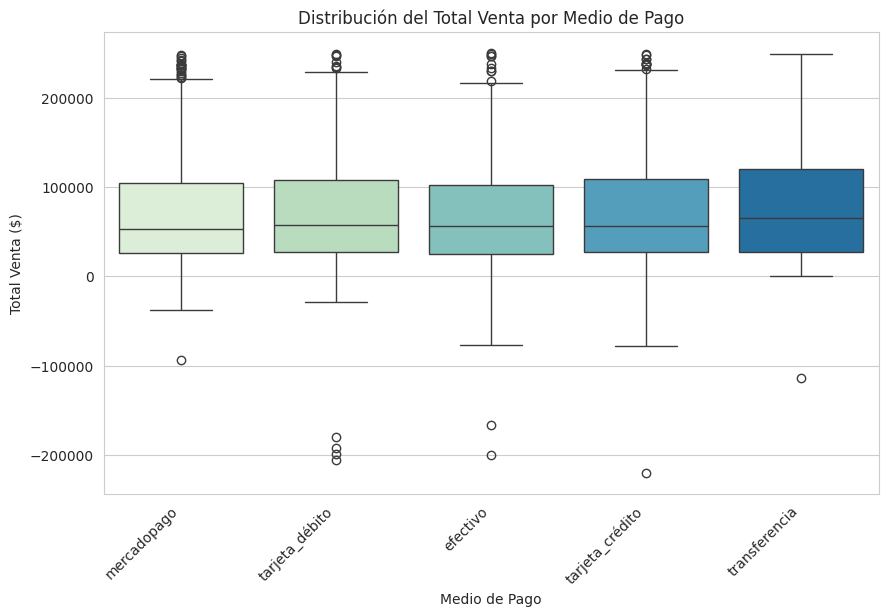

In [82]:
df_pago_venta = df_ferreteria.groupby('Medio de Pago')['Total Venta'].agg(['count', 'mean']).reset_index()
df_pago_venta.columns = ['Medio de Pago', 'Conteo Transacciones', 'Ticket Promedio']
df_pago_venta = df_pago_venta.sort_values(by='Ticket Promedio', ascending=False)

print("\n--- 3. Ticket Promedio por Medio de Pago ---")
print(df_pago_venta.to_markdown(index=False, floatfmt=".2f"))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Medio de Pago', y='Total Venta', data=df_ferreteria, palette='GnBu')
plt.title('Distribución del Total Venta por Medio de Pago')
plt.ylabel('Total Venta ($)')
plt.xlabel('Medio de Pago')
plt.xticks(rotation=45, ha='right')
plt.show()

**Análisis multivariado**

##PROMOCIONES

--- TICKET PROMEDIO POR PROMOCIÓN ---
| Promo Pago           |   Ticket Promedio |
|:---------------------|------------------:|
| 5% off efectivo      |          76216.34 |
| Sin Promoción        |          74098.67 |
| 3 cuotas sin interés |          73141.26 |


/tmp/ipython-input-4098300659.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo Pago', y='Ticket Promedio', data=df_promo_descuento, palette='coolwarm')


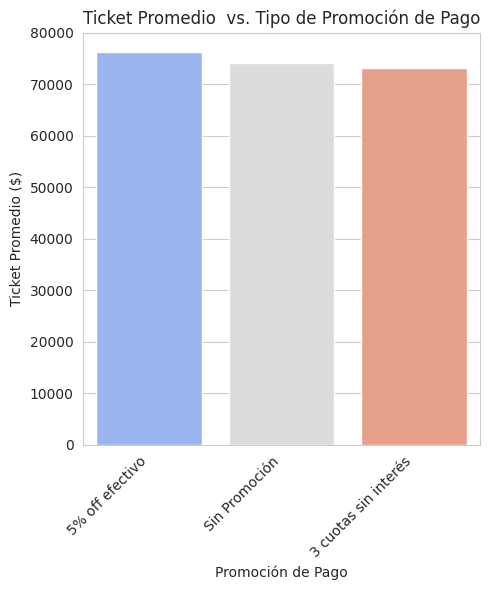

In [83]:
df_temp = df_ferreteria.copy()
# Rellenamos los NaN o strings vacíos en la columna 'Promo Pago' con 'Ninguna'
df_temp['Promo Pago'] = df_temp['Promo Pago'].fillna('Ninguna').replace('', 'Ninguna')

df_descuento = df_temp[df_temp['Medio de Pago'] == 'tarjeta_crédito'].copy()


df_promo_descuento = df_descuento.groupby('Promo Pago')['Total Venta'].mean().reset_index()
df_promo_descuento.columns = ['Promo Pago', 'Ticket Promedio']
df_promo_descuento = df_promo_descuento.sort_values(by='Ticket Promedio', ascending=False)

print("--- TICKET PROMEDIO POR PROMOCIÓN ---")
print(df_promo_descuento.to_markdown(index=False, floatfmt=".2f"))

plt.figure(figsize=(5, 6))
sns.barplot(x='Promo Pago', y='Ticket Promedio', data=df_promo_descuento, palette='coolwarm')
plt.title('Ticket Promedio  vs. Tipo de Promoción de Pago')
plt.ylabel('Ticket Promedio ($)')
plt.xlabel('Promoción de Pago')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se visualiza una leve tendencia a abonar efectivo para acceder a las promos


##**Conclusiones del EDA**

Resultados de las hipotesis:

H1: Dominio de Herramientas

CONFIRMADA

Las categorías "Herramientas manuales" y "Herramientas eléctricas" son, en conjunto, el principal motor de ingresos, impulsando la mayor parte del Total Venta.

H2: Ticket Alto con Crédito y Promoción

REFUTADA

La compra en efectivo registra el Ticket Promedio más alto. El análisis multivariado demostró que este  gasto está  correlacionado con el uso de promociones de "descuento en efectivo".

H3: Rendimiento Geográfico

REFUTADA

Mendoza y Córdoba dominan el volumen de transacciones. La sucursal con el Ticket Promedio más alto no es necesariamente la de Buenos Aires/Palermo, lo que desmiente la presunción inicial de un mayor valor por cliente en la capital.

# =======================================================
#    PARTE 2: MODELADO Y PREDICCIÓN (MACHINE LEARNING)
# =======================================================

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [90]:
# ---------------------------------------------------------
# 1. Preprocesamiento de Datos para el Modelo
# ---------------------------------------------------------
print("--- Preparando datos para el modelo ---")

df_model = df_ferreteria.copy()

df_model = df_model.dropna()

y = df_model['Total Venta']

cols_a_eliminar = ['ID Venta', 'ID Cliente', 'Nombre Cliente', 'Fecha y Hora', 'Total Venta', 'Precio Unitario']
X = df_model.drop(cols_a_eliminar, axis=1, errors='ignore')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in X.columns:
    # Si la columna es de tipo 'object' (texto) o 'category'
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        print(f"Codificando columna de texto: {col}...")
        X[col] = le.fit_transform(X[col].astype(str))

print("\n--- Verificación de Tipos de Datos ---")
print(X.dtypes)

--- Preparando datos para el modelo ---
Codificando columna de texto: Sucursal...
Codificando columna de texto: Provincia...
Codificando columna de texto: Producto...
Codificando columna de texto: Categoría...
Codificando columna de texto: Medio de Pago...
Codificando columna de texto: Promo Producto...
Codificando columna de texto: Promo Pago...
Codificando columna de texto: otros_productos...

--- Verificación de Tipos de Datos ---
Sucursal             int64
Provincia            int64
Producto             int64
Categoría            int64
Cantidad           float64
Medio de Pago        int64
Promo Producto       int64
Promo Pago           int64
otros_productos      int64
anio                 int32
mes                  int32
dia                  int32
dtype: object


In [91]:
from sklearn.feature_selection import SelectKBest, f_regression

In [92]:
print("\nEjecutando SelectKBest...")
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

cols_seleccionadas = X.columns[selector.get_support()]
print(f"✅ Características seleccionadas: {list(cols_seleccionadas)}")


Ejecutando SelectKBest...
✅ Características seleccionadas: ['Provincia', 'Cantidad', 'Medio de Pago', 'Promo Producto', 'dia']


In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [94]:
print("--- Entrenando el modelo ---")

--- Entrenando el modelo ---


In [96]:
# División de datos: 80% entrenamiento, 20% testeo
# Uso X_new (las mejores features seleccionadas)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [98]:
# Elijo Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print("✅ Modelo entrenado correctamente.")

✅ Modelo entrenado correctamente.



--- Resultados de la Validación ---
R² (Precisión del modelo): 0.4334
MAE (Error promedio en $): 34556.56
RMSE (Error cuadrático medio): 44001.78


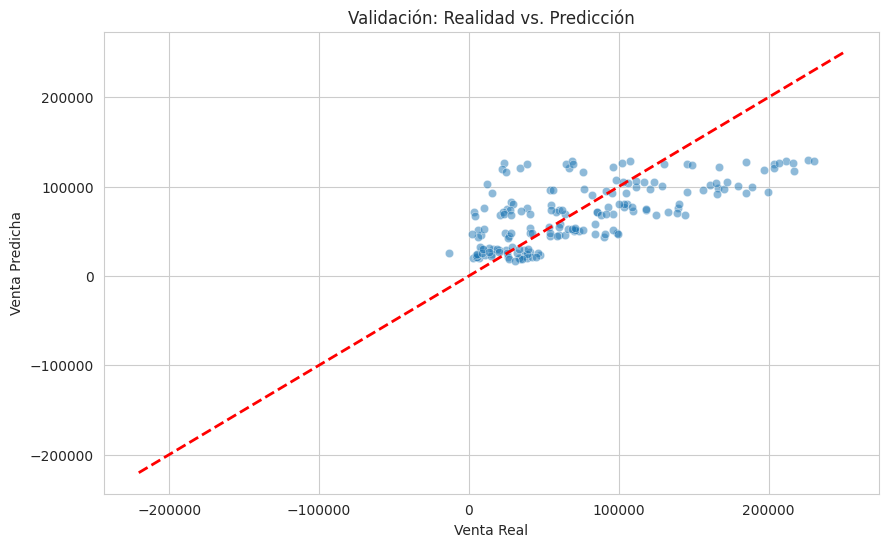

In [99]:
# ---------------------------------------------------------
# Cálculo de Métricas para Validar
# ---------------------------------------------------------
# Hago predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calculo métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n--- Resultados de la Validación ---")
print(f"R² (Precisión del modelo): {r2:.4f}")
print(f"MAE (Error promedio en $): {mae:.2f}")
print(f"RMSE (Error cuadrático medio): {rmse:.2f}")

# Gráfico: Real vs Predicho
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Línea perfecta
plt.xlabel('Venta Real')
plt.ylabel('Venta Predicha')
plt.title('Validación: Realidad vs. Predicción')
plt.show()



In [100]:
# ---------------------------------------------------------
# Generación de Conclusiones Automáticas
# ---------------------------------------------------------
print("\n--- CONCLUSIONES DEL MODELO ---")
if r2 > 0.7:
    calidad = "bueno"
    detalle = "El modelo logra explicar gran parte de la variabilidad de las ventas."
elif r2 > 0.4:
    calidad = "moderado"
    detalle = "El modelo captura algunas tendencias, pero hay factores externos que no estamos midiendo."
else:
    calidad = "bajo"
    detalle = "Es difícil predecir la venta exacta solo con estas variables. Se requerirían más datos."

print(f"1. Desempeño: El modelo tiene un rendimiento {calidad} (R² = {r2:.2f}).")
print(f"2. {detalle}")
print(f"3. Error: En promedio, el modelo se desvía ${mae:.0f} pesos del valor real de venta.")
print("4. Feature Selection: Se utilizaron las 5 variables más influyentes encontradas por el algoritmo SelectKBest.")


--- CONCLUSIONES DEL MODELO ---
1. Desempeño: El modelo tiene un rendimiento moderado (R² = 0.43).
2. El modelo captura algunas tendencias, pero hay factores externos que no estamos midiendo.
3. Error: En promedio, el modelo se desvía $34557 pesos del valor real de venta.
4. Feature Selection: Se utilizaron las 5 variables más influyentes encontradas por el algoritmo SelectKBest.
